# Build a Logistic Regression model

## Data preprocessing

### Importing the libraries 📚

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset 📑

In [3]:
data = pd.read_csv("Social_Network_Ads.csv")
print(data.head())
print(data.info())

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None


### Spliting dataset into features(x) and target labels(y)

In [4]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

### Displaying the dataset

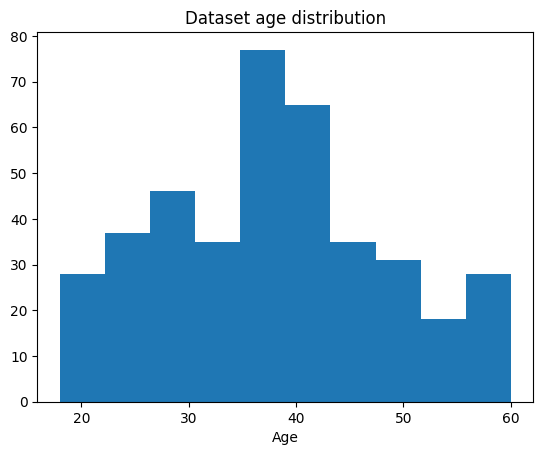

In [5]:
fig, axe = plt.subplots()
axe.hist(x=x[:, 0])
axe.set_title("Dataset age distribution")
axe.set_xlabel("Age")
fig.show()

In [6]:
# plotly library
import plotly.express as px
fig = px.scatter(data, x='EstimatedSalary', y='Purchased', color='Age')
fig.show()

### Spliting the dataset into training set and test set

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [8]:
print(x_test[:5])
print(y_test[:5])

[[   30 87000]
 [   38 50000]
 [   35 75000]
 [   30 79000]
 [   35 50000]]
[0 0 0 0 0]


### Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [10]:
print(x_train_scaled[:5])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]]


In [11]:
print(y_test[:5])

[0 0 0 0 0]


## Build and train model 💹

In [12]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=0)
log_model.fit(x_train_scaled, y_train)

LogisticRegression(random_state=0)

### Model prediction 📈

In [13]:
print(log_model.predict(sc.transform([[30, 87000]])))

[0]


In [14]:
y_pred = log_model.predict(x_test_scaled)
print(np.concatenate((y_test.reshape(-1, 1), y_pred.reshape(-1, 1)), axis = 1)[:5])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


## Model Evaluation

### Making the Confusion matrix

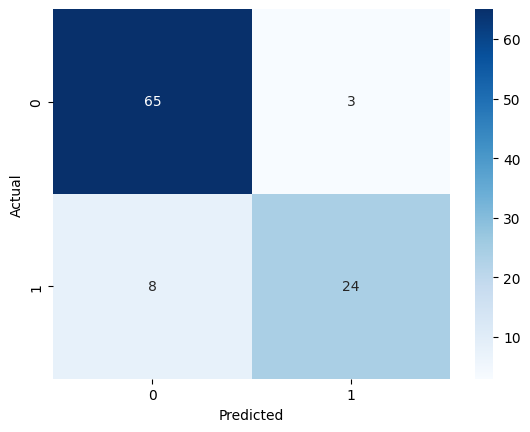

In [15]:
# Displaying it with seaborn library
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
cm

array([[65,  3],
       [ 8, 24]])

In [17]:
# Display it with plotly library
import plotly.graph_objects as go
fig = go.Figure(data=go.Heatmap(z=cm, x=[0, 1], y=[0, 1], text=cm, texttemplate="%{text}", colorscale="Reds"))
fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual", width=600)
fig.update_yaxes(autorange='reversed')
fig.show()

In [16]:
# Model accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.89

In [19]:
# ROC curve
from sklearn.metrics import roc_curve, auc
y_score = log_model.predict_proba(x_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC curve (AUC = {roc_auc:.2f})'))
fig_2.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random chance', line=dict(color="green")))
fig_2.update_layout(xaxis_title="False positive rate", yaxis_title="True positive rate")
fig_2.show()

## Model performance visualization

/tmp/ipython-input-297500117.py:11: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



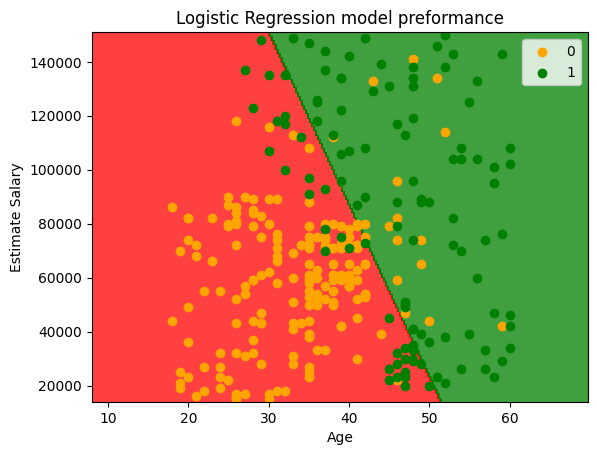

In [20]:
# Displaying the train set
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(sc.transform(x_train)), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step=0.25),
                     np.arange(start = X_set[:, 1].min() -1000, stop = X_set[:, 1].max() + 1000, step=0.25))
plt.contourf(X1, X2, log_model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('orange', 'green'))(i), label = j)
plt.title("Logistic Regression model preformance")
plt.xlabel("Age")
plt.ylabel("Estimate Salary")
plt.legend()
plt.show()

/tmp/ipython-input-2094244064.py:11: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



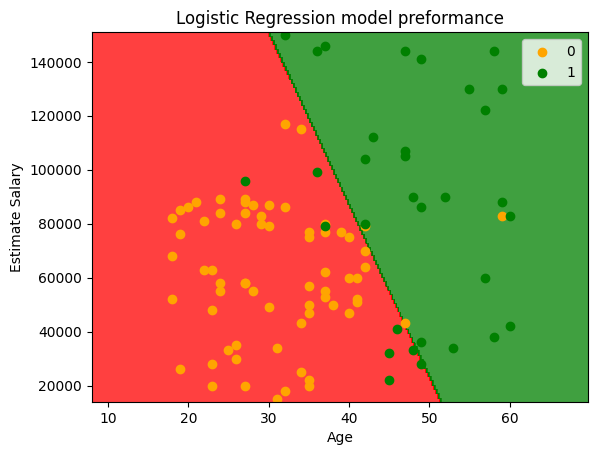

In [17]:
# Displaying the test set
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(sc.transform(x_test)), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step=0.25),
                     np.arange(start = X_set[:, 1].min() -1000, stop = X_set[:, 1].max() + 1000, step=0.25))
plt.contourf(X1, X2, log_model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('orange', 'green'))(i), label = j)
plt.title("Logistic Regression model preformance")
plt.xlabel("Age")
plt.ylabel("Estimate Salary")
plt.legend()
plt.show()